# Household Power Consumption Dataset

    
* **global_active_power**: The total active power consumed by the household (kilowatts).
* **global_reactive_power**: The total reactive power consumed by the household (kilowatts).
    voltage: Average voltage (volts).
* **global_intensity**: Average current intensity (amps).
* **sub_metering_1**: Active energy for kitchen (watt-hours of active energy).
* **sub_metering_2**: Active energy for laundry (watt-hours of active energy).
* **sub_metering_3**: Active energy for climate control systems (watt-hours of active energy).


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [3]:
df = pd.read_csv('household_power_consumption.txt', 
                 sep=';',
                 na_values=['nan','?'],
                 parse_dates={'datetime' : ['Date', 'Time']},
                 index_col='datetime',
                 infer_datetime_format=True)

In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


# Imputation : Handling missing data

In [6]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
# number of days with missing values
len(set(list(df[df.isnull().any(axis=1)].index.date)))

82

In [8]:
set(list(df[df.isnull().any(axis=1)].index.date))

{datetime.date(2006, 12, 21),
 datetime.date(2006, 12, 30),
 datetime.date(2007, 1, 14),
 datetime.date(2007, 1, 28),
 datetime.date(2007, 2, 22),
 datetime.date(2007, 3, 25),
 datetime.date(2007, 4, 28),
 datetime.date(2007, 4, 29),
 datetime.date(2007, 4, 30),
 datetime.date(2007, 6, 1),
 datetime.date(2007, 6, 6),
 datetime.date(2007, 6, 9),
 datetime.date(2007, 6, 19),
 datetime.date(2007, 6, 29),
 datetime.date(2007, 7, 15),
 datetime.date(2007, 7, 22),
 datetime.date(2007, 8, 1),
 datetime.date(2007, 8, 24),
 datetime.date(2007, 9, 26),
 datetime.date(2007, 10, 23),
 datetime.date(2007, 11, 21),
 datetime.date(2007, 11, 29),
 datetime.date(2007, 12, 17),
 datetime.date(2008, 1, 13),
 datetime.date(2008, 2, 2),
 datetime.date(2008, 2, 23),
 datetime.date(2008, 3, 24),
 datetime.date(2008, 5, 16),
 datetime.date(2008, 6, 13),
 datetime.date(2008, 7, 13),
 datetime.date(2008, 8, 4),
 datetime.date(2008, 8, 31),
 datetime.date(2008, 10, 25),
 datetime.date(2008, 11, 10),
 datetime.da

In [9]:
# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [10]:
imputer.fit(df.values)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [11]:
df = pd.DataFrame(data=imputer.transform(df.values), columns=df.columns, index=df.index)

In [12]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# Data visualization

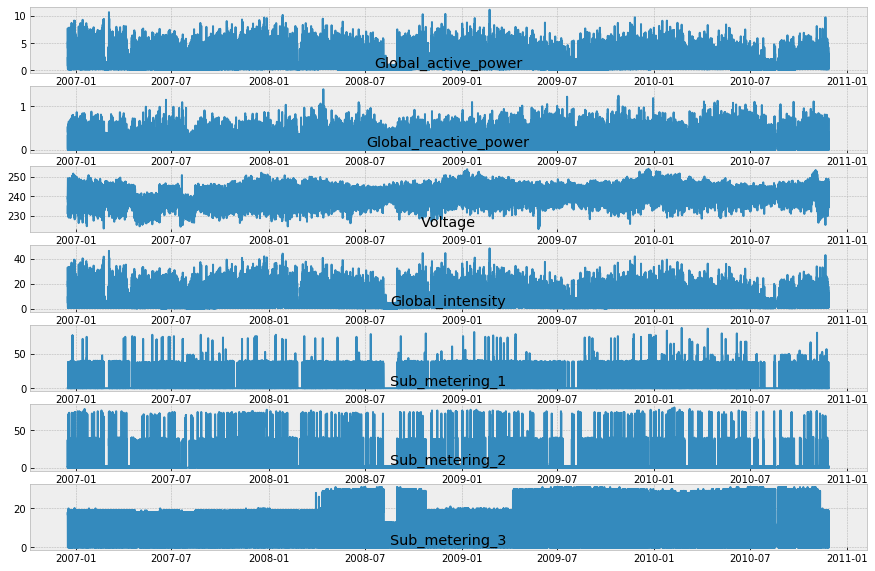

In [13]:
# First we plot all the variables
plt.style.use('bmh')
plt.figure(figsize=(15,10))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0)
plt.show()

### Zoom to active power

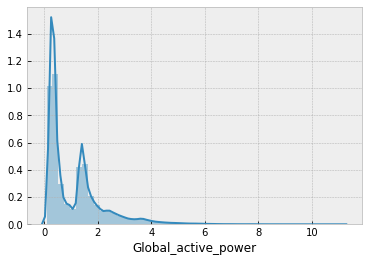

In [14]:
sns.distplot(df['Global_active_power'])

### Distributions of Sub metering(s)

In [16]:
df['Sub_metering_1'].unique()

array([ 0.,  1.,  2.,  6., 37., 36., 38., 25., 12., 11.,  9.,  4., 33.,
        5., 34.,  8., 26., 27., 15., 20., 21., 23., 16., 10., 39., 32.,
       19., 35., 30., 40.,  7., 31., 17.,  3., 29., 24., 14., 41., 53.,
       76., 75., 77., 74., 28., 68., 58., 62., 13., 18., 22., 64., 71.,
       56., 72., 45., 42., 59., 66., 43., 44., 48., 46., 73., 55., 60.,
       70., 63., 67., 47., 65., 51., 50., 69., 78., 57., 49., 61., 52.,
       54., 79., 80., 81., 82., 83., 84., 88., 86., 87.])

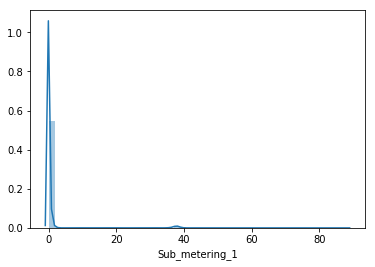

In [17]:
sns.distplot(df['Sub_metering_1'])

In [18]:
df['Sub_metering_2'].unique()

array([ 1.,  2.,  0., 16., 37., 36., 22., 12., 27., 20.,  9.,  4.,  3.,
        5., 13., 35., 28., 26., 24., 21., 17., 33., 25., 23., 18., 30.,
       31.,  7., 38., 29., 50., 71., 59., 62., 70., 40., 34.,  8., 15.,
        6., 32., 19., 14., 49., 72., 73., 61., 39., 42., 10., 56., 11.,
       43., 67., 63., 53., 65., 52., 69., 48., 74., 41., 47., 58., 68.,
       64., 75., 46., 57., 60., 66., 44., 78., 77., 76., 51., 55., 45.,
       54., 79., 80.])

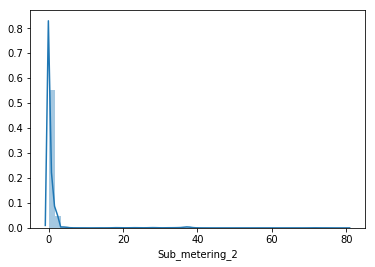

In [19]:
sns.distplot(df['Sub_metering_2'])

In [20]:
df['Sub_metering_3'].unique()

array([17., 16., 18.,  9.,  0.,  5., 19., 10., 20.,  8.,  4.,  2.,  3.,
       11., 13.,  6., 15.,  1., 12., 14.,  7., 23., 25., 26., 28., 27.,
       21., 22., 29., 24., 30., 31.])

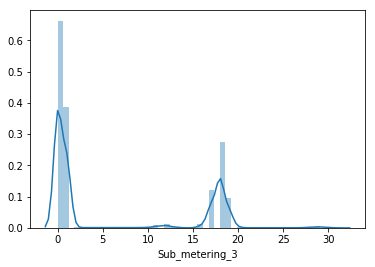

In [21]:
sns.distplot(df['Sub_metering_3'])

## Week Analysis

In [22]:
result = df.loc[(df.index>="2009-02-23") & (df.index<="2009-03-01")]

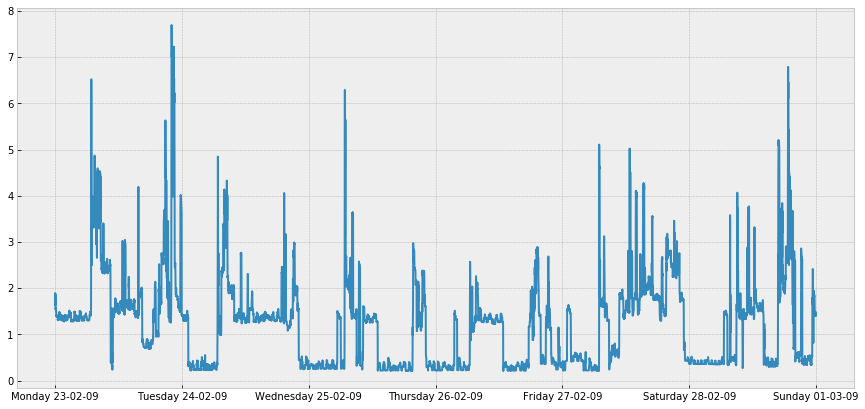

In [23]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
plt.plot(result['Global_active_power'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A %d-%m-%y'))

# Modeling : LSTM

    We will apply the Recurrent Neural Network (LSTM) that best suits time series and sequential problems.
    We will predict "Global_active_power" or "active power" as a Time Series.

### time-shift

In [24]:
def shift_data(data, shift_steps, target_column):
    
    variables = data.copy()
    target = variables[target_column]
    variables.drop([target_column], axis=1, inplace=True)
    
    columns, var_names = list(), list()
    
    # shift (t-n, ..... t-1)
    for i in range(shift_steps, 0, -1):
        columns.append(variables.shift(i))
        var_names += [v + "(t-%d)"%i for v in list(variables.columns)]
    
    
    result = pd.concat(columns, axis=1)
    result.columns = var_names
    result = pd.concat([result, target], axis=1)
    # drop rows with NaN 
    result.dropna(inplace=True)
    
    return result

In [25]:
## resampling data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

In [28]:
# shifted time
df_shifted = shift_data(df_scaled, 1, 'Global_active_power')
df_shifted.head()

,Global_reactive_power(t-1),Voltage(t-1),Global_intensity(t-1),Sub_metering_1(t-1),Sub_metering_2(t-1),Sub_metering_3(t-1),Global_active_power
datetime,,,,,,,
2006-12-16 17:25:00,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.478363
2006-12-16 17:26:00,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.479631
2006-12-16 17:27:00,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.480898
2006-12-16 17:28:00,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.325005
2006-12-16 17:29:00,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.311787


    We will only train the model on the first 2 years of data, then evaluate it on the next 2 years of data.

In [29]:
# split into train and test sets
values = df_shifted.values

n_train_time = 2*365*24 # 2 years
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(17520, 1, 6) (17520,) (2057738, 1, 6) (2057738,)


In [30]:
## for Deep-learing:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [31]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# fit network
history = model.fit(train_X, train_y, epochs=10, 
                    batch_size=200, 
                    validation_data=(test_X, test_y), 
                    verbose=2, shuffle=False)

W0923 18:25:31.605816 140331966994176 deprecation_wrapper.py:119] From /home/ahmed/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0923 18:25:31.633870 140331966994176 deprecation_wrapper.py:119] From /home/ahmed/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0923 18:25:31.643675 140331966994176 deprecation_wrapper.py:119] From /home/ahmed/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0923 18:25:32.008139 140331966994176 deprecation_wrapper.py:119] From /home/ahmed/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default 

Train on 17520 samples, validate on 2057738 samples
Epoch 1/10
 - 12s - loss: 0.0148 - val_loss: 0.0052
Epoch 2/10
 - 11s - loss: 0.0067 - val_loss: 0.0027
Epoch 3/10
 - 11s - loss: 0.0049 - val_loss: 0.0019
Epoch 4/10
 - 14s - loss: 0.0041 - val_loss: 0.0015
Epoch 5/10
 - 15s - loss: 0.0035 - val_loss: 0.0013
Epoch 6/10
 - 15s - loss: 0.0031 - val_loss: 0.0011
Epoch 7/10
 - 15s - loss: 0.0028 - val_loss: 0.0010
Epoch 8/10
 - 15s - loss: 0.0025 - val_loss: 9.7760e-04
Epoch 9/10
 - 15s - loss: 0.0024 - val_loss: 9.2417e-04
Epoch 10/10
 - 15s - loss: 0.0024 - val_loss: 8.8224e-04


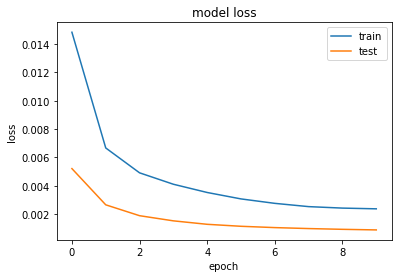

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [35]:
# invert scaling for forecast
y_pred_inv = np.concatenate((y_pred, test_X[:, -(test_X.shape[1]):]), axis=1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)
y_pred_inv = y_pred_inv[:,0]

In [36]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
test_y_inv = np.concatenate((test_y, test_X[:, -(test_X.shape[1]):]), axis=1)
test_y_inv = scaler.inverse_transform(test_y_inv)
test_y_inv = test_y_inv[:,0]

In [37]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_y_inv, y_pred_inv))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.328
